In [17]:
import matplotlib.pyplot as plt
import numpy as np
from clusters.ammonia import Ammonia
from systems_vde import systems
import seaborn as sns
from scipy.stats import gaussian_kde
from scipy.signal import find_peaks

In [18]:
# MP2

In [19]:
def vde_mp2(sys):
    frames, electron, neutral = np.loadtxt(systems[sys].mp2, delimiter=',', unpack=True)

    VDE = []
    for index, frame in enumerate(frames):
        VDE.append((electron[index] - neutral[index]) * 27.211324570273)
    
    return VDE

In [20]:
ammonia_21 = vde_mp2(21)
ammonia_22 = vde_mp2(22)

ammonia_21_max = max(ammonia_21)
ammonia_22_max = max(ammonia_22)

ammonia_34 = vde_mp2(34)
ammonia_34_max = max(ammonia_34)



ammonia_41 = vde_mp2(41)
ammonia_42 = vde_mp2(42)
ammonia_44 = vde_mp2(44)

ammonia_41_max = max(ammonia_41)
ammonia_42_max = max(ammonia_42)
ammonia_44_max = max(ammonia_44)

ammonia_51 = vde_mp2(51)
ammonia_54 = vde_mp2(54)

ammonia_51_max = max(ammonia_51)
ammonia_54_max = max(ammonia_54)

ammonia_62 = vde_mp2(62)
ammonia_62_max = max(ammonia_62)

ammonia_71 = vde_mp2(71)
ammonia_71_max = max(ammonia_71)

ammonia_81 = vde_mp2(81)
ammonia_82 = vde_mp2(82)
ammonia_83 = vde_mp2(83)

ammonia_81_max = max(ammonia_81)
ammonia_82_max = max(ammonia_82)
ammonia_83_max = max(ammonia_83)



systems_mp2 = {'21 ammonia': [ammonia_21, "blue", ammonia_21_max],
                 '22 ammonia': [ammonia_22, "blue", ammonia_22_max],
                 '34 ammonia': [ammonia_34, "red", ammonia_34_max],
                 '41 ammonia': [ammonia_41, "green", ammonia_41_max],
                 '42 ammonia': [ammonia_42, "green", ammonia_42_max],
                 '44 ammonia': [ammonia_44, "green", ammonia_44_max],
                 '51 ammonia': [ammonia_51, "indigo", ammonia_51_max],
                 '54 ammonia': [ammonia_54, "indigo", ammonia_54_max],
                 '62 ammonia': [ammonia_62, "purple", ammonia_62_max],
                 '71 ammonia': [ammonia_71, "lime", ammonia_71_max],
                 '81 ammonia': [ammonia_81, "orange", ammonia_81_max],
                 '82 ammonia': [ammonia_82, "orange", ammonia_82_max],
                 '83 ammonia': [ammonia_83, "orange", ammonia_83_max],}


for i in systems_mp2.keys():
    data = systems_mp2[i][0]
    
    kde = gaussian_kde(data)
    x_values = np.linspace(min(data), max(data), 10000)
    kde_values = kde(x_values)
    peaks, _ = find_peaks(kde_values)
    
    kde_max = []
    for peak in peaks:
        values = [kde_values[peak], x_values[peak]]
        kde_max.append(values)
        
    max_peak = max(kde_max)

    systems_mp2[i].append(max_peak)

In [21]:
# print(systems_mp2.keys())

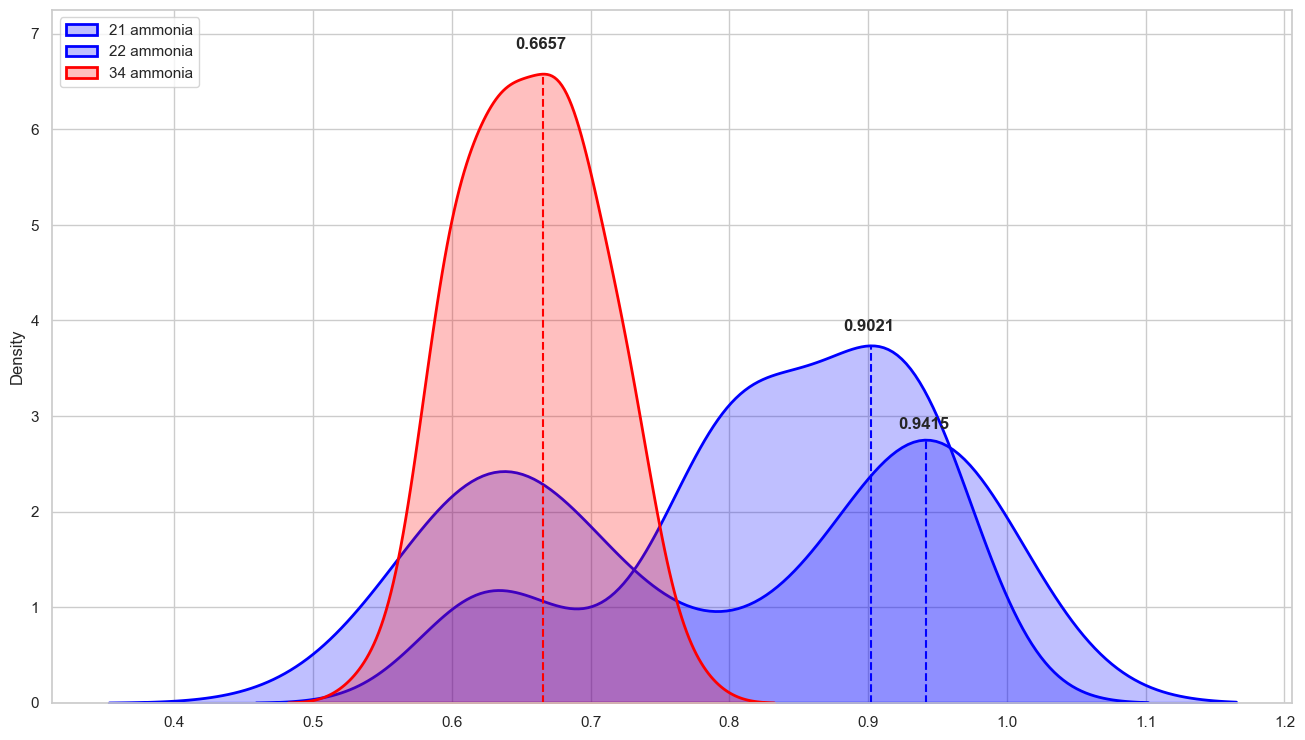

In [22]:
sns.set(style="whitegrid")
plt.figure(figsize=(16, 9))


for i in ['21 ammonia','22 ammonia', '34 ammonia']:
    sns.kdeplot(data=systems_mp2[i][0], fill=True, lw=2, label=i, color=systems_mp2[i][1])
    
    x = [systems_mp2[i][3][1], systems_mp2[i][3][1]]
    y = [0, systems_mp2[i][3][0]]
    
    plt.plot(x,y, color=systems_mp2[i][1], linestyle='--')
    
    plt.text(systems_mp2[i][3][1] - 0.02, systems_mp2[i][3][0] * 1.04, f'{systems_mp2[i][3][1]:.4f}', fontweight='bold')

plt.ylim(0, 7.25)
plt.legend(loc='upper left')
plt.show()

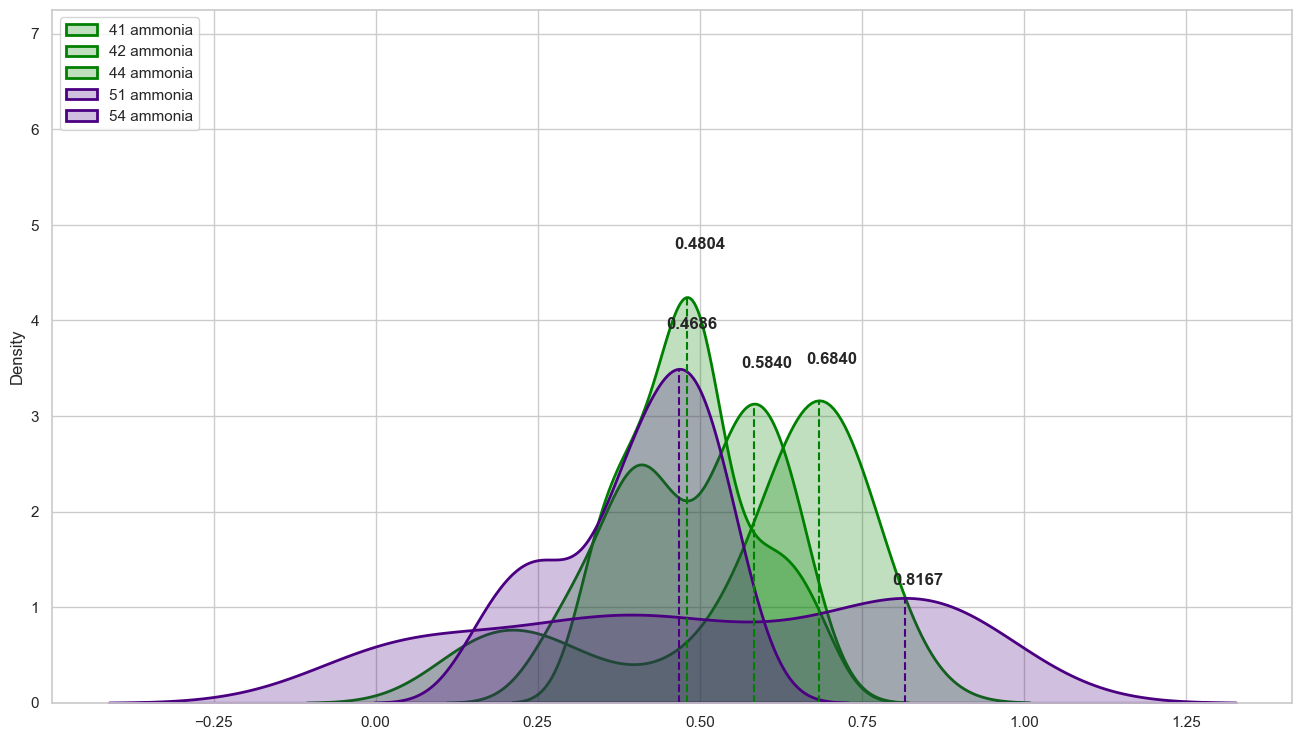

In [23]:
sns.set(style="whitegrid")
plt.figure(figsize=(16, 9))


for i in ['41 ammonia','42 ammonia', '44 ammonia', '51 ammonia', '54 ammonia']:
    sns.kdeplot(data=systems_mp2[i][0], fill=True, lw=2, label=i, color=systems_mp2[i][1])
    
    x = [systems_mp2[i][3][1], systems_mp2[i][3][1]]
    y = [0, systems_mp2[i][3][0]]
    
    plt.plot(x,y, color=systems_mp2[i][1], linestyle='--')
    
    plt.text(systems_mp2[i][3][1] - 0.02, systems_mp2[i][3][0] * 1.12, f'{systems_mp2[i][3][1]:.4f}', fontweight='bold')

plt.ylim(0, 7.25)
plt.legend(loc='upper left')
plt.show()

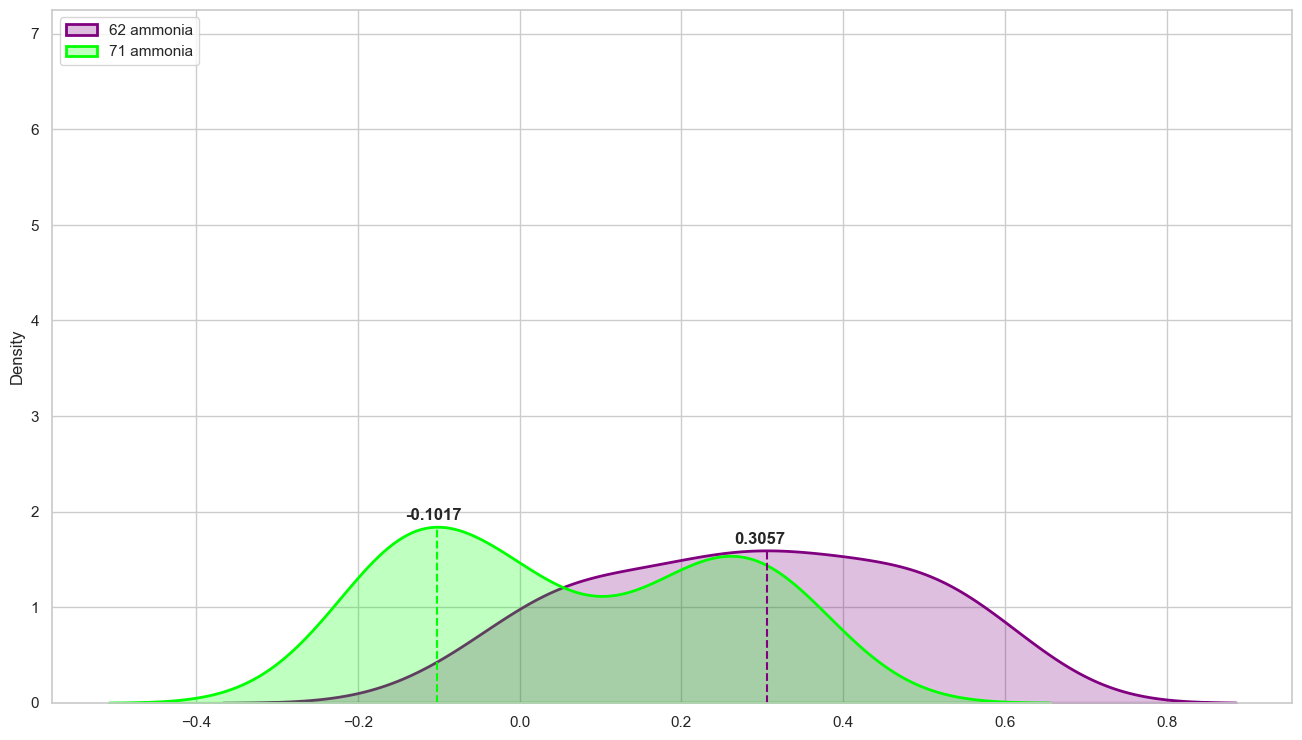

In [24]:
sns.set(style="whitegrid")
plt.figure(figsize=(16, 9))


for i in ['62 ammonia','71 ammonia']:
    sns.kdeplot(data=systems_mp2[i][0], fill=True, lw=2, label=i, color=systems_mp2[i][1])
    
    x = [systems_mp2[i][3][1], systems_mp2[i][3][1]]
    y = [0, systems_mp2[i][3][0]]
    
    plt.plot(x,y, color=systems_mp2[i][1], linestyle='--')
    
    plt.text(systems_mp2[i][3][1] - 0.04, systems_mp2[i][3][0] * 1.04, f'{systems_mp2[i][3][1]:.4f}', fontweight='bold')

plt.ylim(0, 7.25)
plt.legend(loc='upper left')
plt.show()

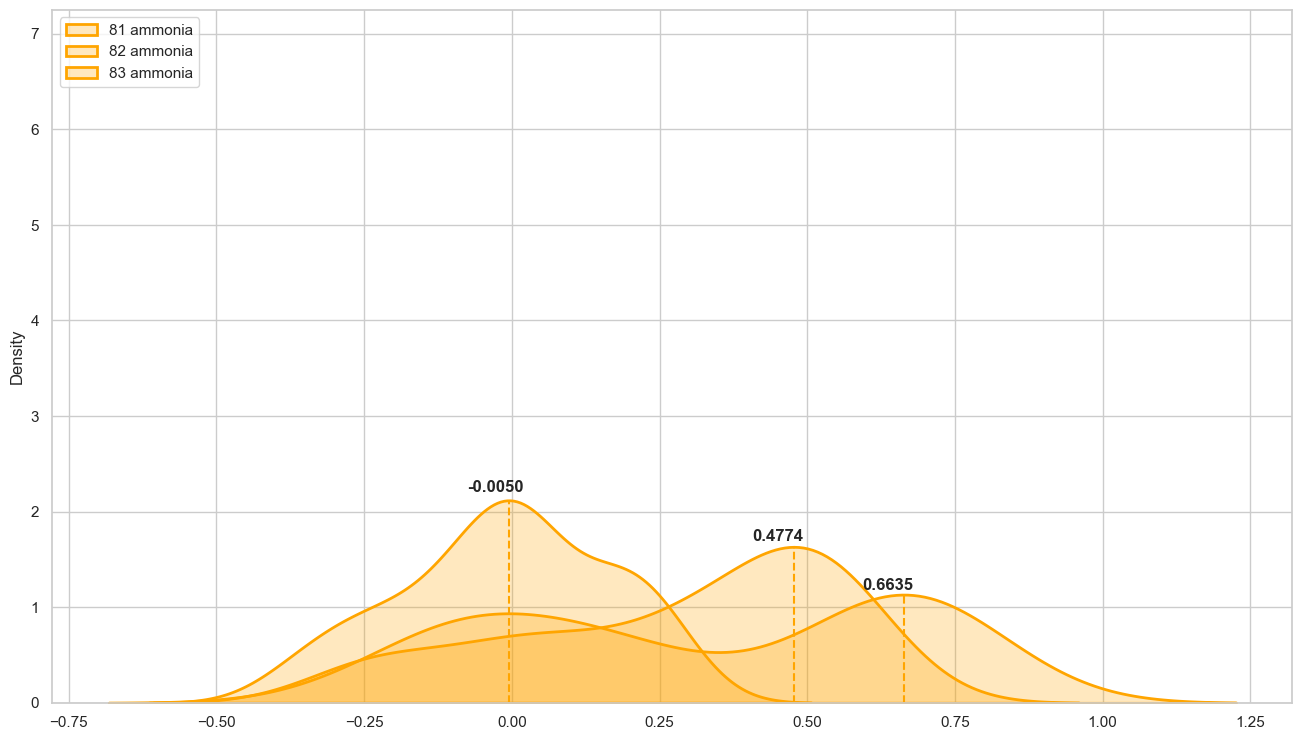

In [25]:
sns.set(style="whitegrid")
plt.figure(figsize=(16, 9))


for i in ['81 ammonia','82 ammonia', '83 ammonia']:
    sns.kdeplot(data=systems_mp2[i][0], fill=True, lw=2, label=i, color=systems_mp2[i][1])
    
    x = [systems_mp2[i][3][1], systems_mp2[i][3][1]]
    y = [0, systems_mp2[i][3][0]]
    
    plt.plot(x,y, color=systems_mp2[i][1], linestyle='--')
    
    plt.text(systems_mp2[i][3][1] - 0.07, systems_mp2[i][3][0] * 1.04, f'{systems_mp2[i][3][1]:.4f}', fontweight='bold')

plt.ylim(0, 7.25)
plt.legend(loc='upper left')
plt.show()

In [26]:
# B3LYP

In [27]:
def vde_b3lyp(sys):
    frames, electron, neutral = np.loadtxt(systems[sys].b3lyp, delimiter=',', unpack=True)

    VDE = []
    for index, frame in enumerate(frames):
        VDE.append((electron[index] - neutral[index]) * 27.211324570273)
    
    return VDE

In [28]:
ammonia_21 = vde_b3lyp(21)
ammonia_22 = vde_b3lyp(22)

ammonia_21_max = max(ammonia_21)
ammonia_22_max = max(ammonia_22)

ammonia_34 = vde_b3lyp(34)
ammonia_34_max = max(ammonia_34)



ammonia_41 = vde_b3lyp(41)
ammonia_42 = vde_b3lyp(42)
ammonia_44 = vde_b3lyp(44)

ammonia_41_max = max(ammonia_41)
ammonia_42_max = max(ammonia_42)
ammonia_44_max = max(ammonia_44)

ammonia_51 = vde_b3lyp(51)
ammonia_54 = vde_b3lyp(54)

ammonia_51_max = max(ammonia_51)
ammonia_54_max = max(ammonia_54)

ammonia_62 = vde_b3lyp(62)
ammonia_62_max = max(ammonia_62)

ammonia_71 = vde_b3lyp(71)
ammonia_71_max = max(ammonia_71)

ammonia_81 = vde_b3lyp(81)
ammonia_82 = vde_b3lyp(82)
ammonia_83 = vde_b3lyp(83)

ammonia_81_max = max(ammonia_81)
ammonia_82_max = max(ammonia_82)
ammonia_83_max = max(ammonia_83)



systems_b3lyp = {'21 ammonia': [ammonia_21, "blue", ammonia_21_max],
                 '22 ammonia': [ammonia_22, "blue", ammonia_22_max],
                 '34 ammonia': [ammonia_34, "red", ammonia_34_max],
                 '41 ammonia': [ammonia_41, "green", ammonia_41_max],
                 '42 ammonia': [ammonia_42, "green", ammonia_42_max],
                 '44 ammonia': [ammonia_44, "green", ammonia_44_max],
                 '51 ammonia': [ammonia_51, "indigo", ammonia_51_max],
                 '54 ammonia': [ammonia_54, "indigo", ammonia_54_max],
                 '62 ammonia': [ammonia_62, "purple", ammonia_62_max],
                 '71 ammonia': [ammonia_71, "lime", ammonia_71_max],
                 '81 ammonia': [ammonia_81, "orange", ammonia_81_max],
                 '82 ammonia': [ammonia_82, "orange", ammonia_82_max],
                 '83 ammonia': [ammonia_83, "orange", ammonia_83_max],}


for i in systems_b3lyp.keys():
    data = systems_b3lyp[i][0]
    
    kde = gaussian_kde(data)
    x_values = np.linspace(min(data), max(data), 10000)
    kde_values = kde(x_values)
    peaks, _ = find_peaks(kde_values)
    
    kde_max = []
    for peak in peaks:
        values = [kde_values[peak], x_values[peak]]
        kde_max.append(values)
        
    max_peak = max(kde_max)

    systems_b3lyp[i].append(max_peak)

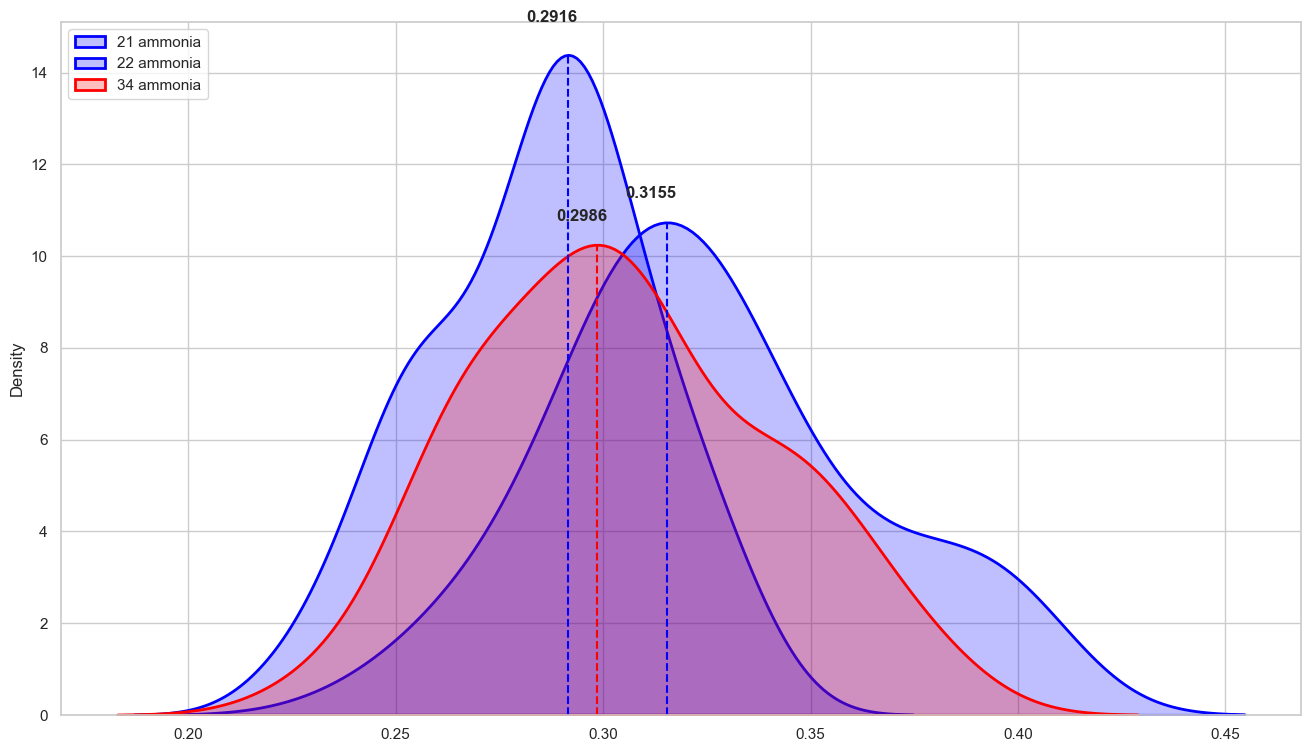

In [29]:
sns.set(style="whitegrid")
plt.figure(figsize=(16, 9))

for i in ['21 ammonia','22 ammonia', '34 ammonia']:
    sns.kdeplot(data=systems_b3lyp[i][0], fill=True, lw=2, label=i, color=systems_b3lyp[i][1])
    
    x = [systems_b3lyp[i][3][1], systems_b3lyp[i][3][1]]
    y = [0, systems_b3lyp[i][3][0]]
    
    plt.plot(x,y, color=systems_b3lyp[i][1], linestyle='--')
    
    plt.text(systems_b3lyp[i][3][1] - 0.01, systems_b3lyp[i][3][0] * 1.05, f'{systems_b3lyp[i][3][1]:.4f}', fontweight='bold')

# plt.ylim(0, 12)
plt.legend(loc='upper left')
plt.show()

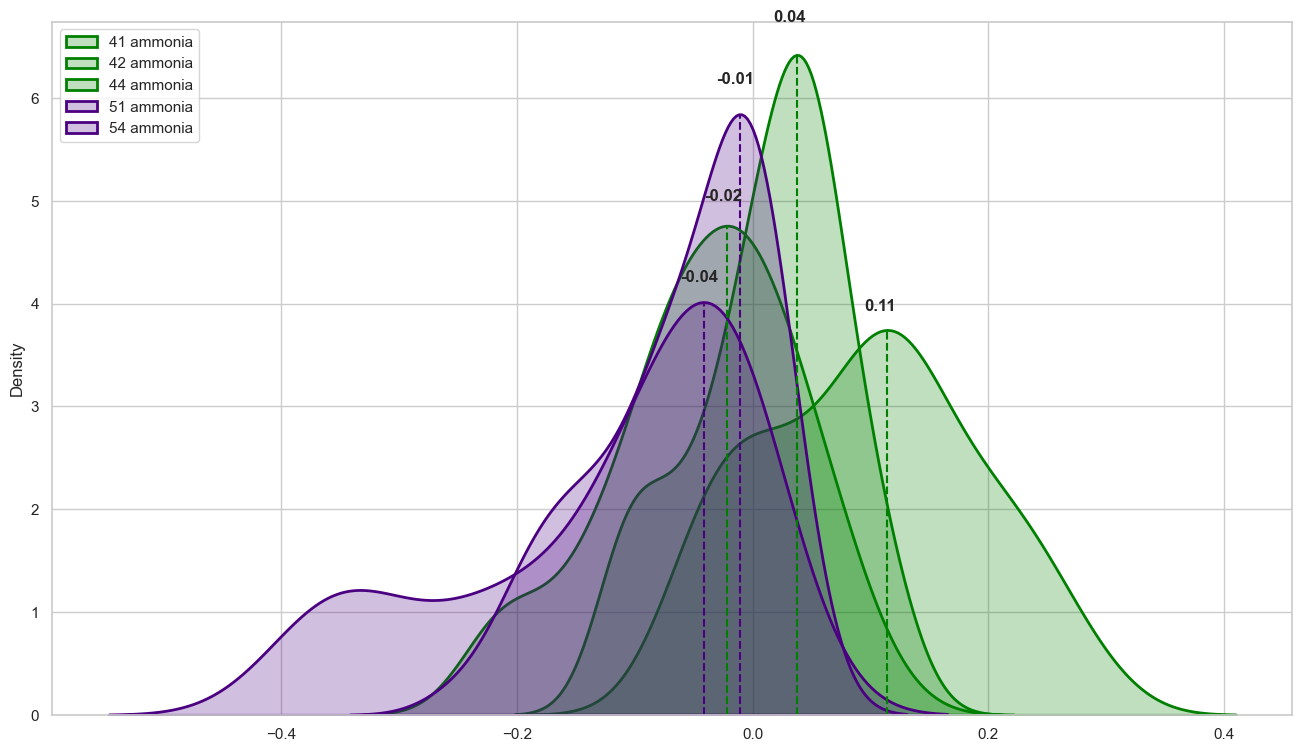

In [30]:
sns.set(style="whitegrid")
plt.figure(figsize=(16, 9))

for i in ['41 ammonia','42 ammonia', '44 ammonia', '51 ammonia', '54 ammonia']:
    sns.kdeplot(data=systems_b3lyp[i][0], fill=True, lw=2, label=i, color=systems_b3lyp[i][1])
    
    x = [systems_b3lyp[i][3][1], systems_b3lyp[i][3][1]]
    y = [0, systems_b3lyp[i][3][0]]
    
    plt.plot(x,y, color=systems_b3lyp[i][1], linestyle='--')
    
    plt.text(systems_b3lyp[i][3][1] - 0.02, systems_b3lyp[i][3][0] * 1.05, f'{systems_b3lyp[i][3][1]:.2f}', fontweight='bold')

# plt.ylim(0, 12)
plt.legend(loc='upper left')
plt.show()

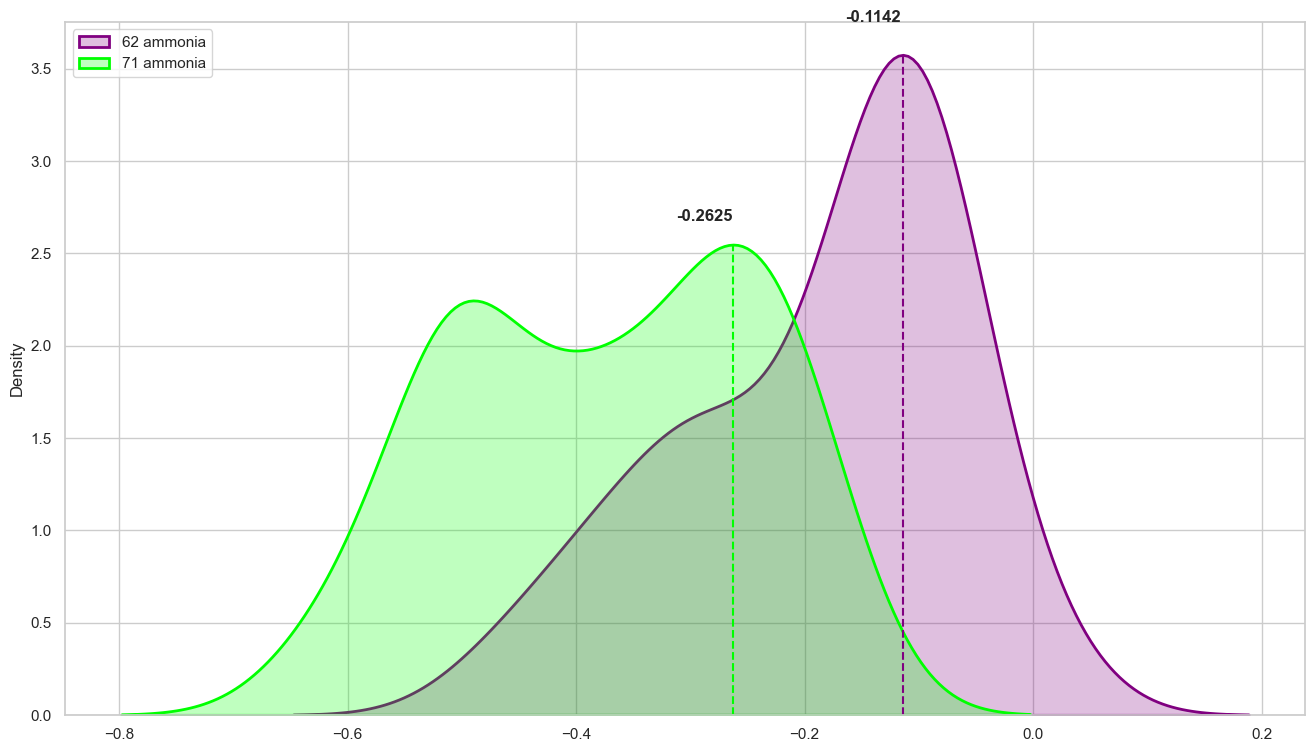

In [31]:
sns.set(style="whitegrid")
plt.figure(figsize=(16, 9))

for i in ['62 ammonia','71 ammonia']:
    sns.kdeplot(data=systems_b3lyp[i][0], fill=True, lw=2, label=i, color=systems_b3lyp[i][1])
    
    x = [systems_b3lyp[i][3][1], systems_b3lyp[i][3][1]]
    y = [0, systems_b3lyp[i][3][0]]
    
    plt.plot(x,y, color=systems_b3lyp[i][1], linestyle='--')
    
    plt.text(systems_b3lyp[i][3][1] - 0.05, systems_b3lyp[i][3][0] * 1.05, f'{systems_b3lyp[i][3][1]:.4f}', fontweight='bold')

# plt.ylim(0, 12)
plt.legend(loc='upper left')
plt.show()

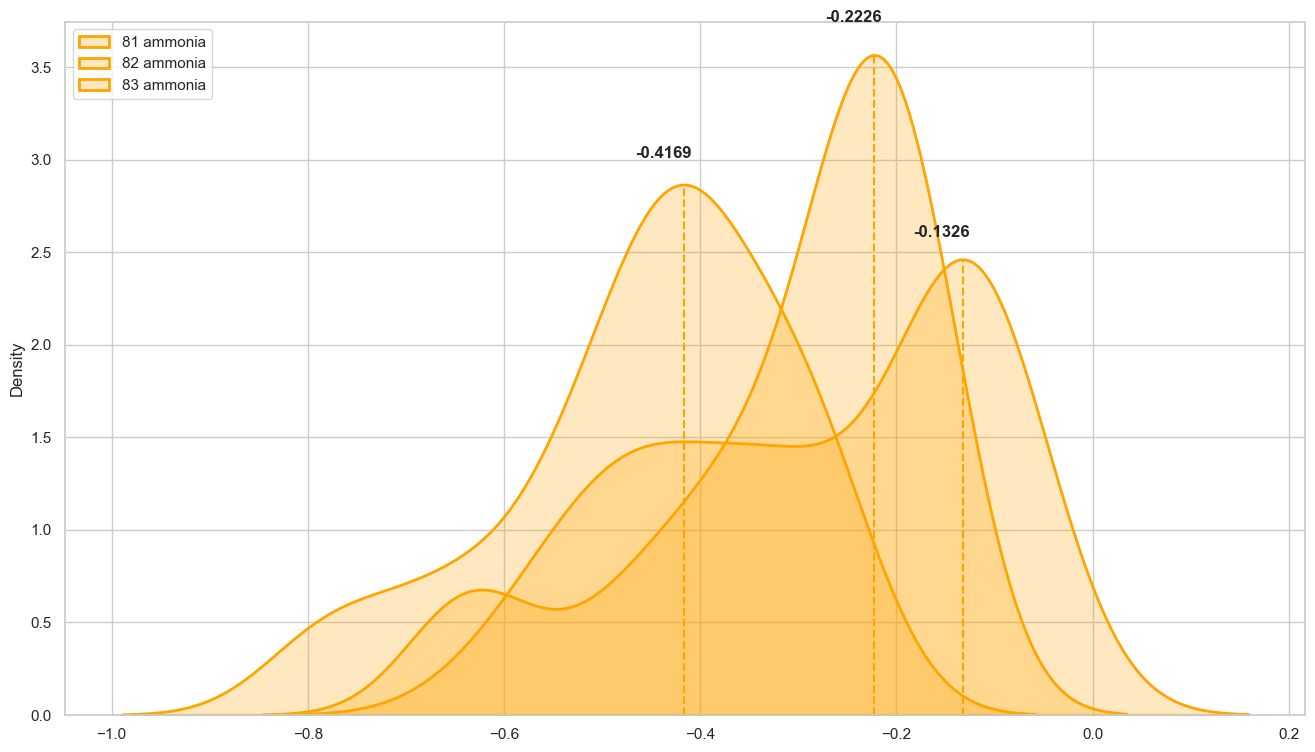

In [32]:
sns.set(style="whitegrid")
plt.figure(figsize=(16, 9))

for i in ['81 ammonia','82 ammonia', '83 ammonia']:
    sns.kdeplot(data=systems_b3lyp[i][0], fill=True, lw=2, label=i, color=systems_b3lyp[i][1])
    
    x = [systems_b3lyp[i][3][1], systems_b3lyp[i][3][1]]
    y = [0, systems_b3lyp[i][3][0]]
    
    plt.plot(x,y, color=systems_b3lyp[i][1], linestyle='--')
    
    plt.text(systems_b3lyp[i][3][1] - 0.05, systems_b3lyp[i][3][0] * 1.05, f'{systems_b3lyp[i][3][1]:.4f}', fontweight='bold')

# plt.ylim(0, 12)
plt.legend(loc='upper left')
plt.show()